In [1]:
import pandas as pd

# Read the CSV file (located in the same directory as the notebook)
df = pd.read_csv('youtube_shorts_performance_dataset.csv')

# Display the first few rows to verify
df.head()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech


In [2]:
print("shape of the data",df.shape)
print("columns of the data",df.columns)
print("null values in the data",df.isnull().sum())
print("description of the data",df.describe())

shape of the data (300, 10)
columns of the data Index(['video_id', 'title', 'duration_sec', 'hashtags_count', 'views', 'likes',
       'comments', 'shares', 'upload_hour', 'category'],
      dtype='object')
null values in the data video_id          0
title             0
duration_sec      0
hashtags_count    0
views             0
likes             0
comments          0
shares            0
upload_hour       0
category          0
dtype: int64
description of the data        duration_sec  hashtags_count          views         likes     comments  \
count    300.000000      300.000000     300.000000    300.000000   300.000000   
mean      31.730000        4.343333  245058.166667  23063.126667  2638.296667   
std       16.042912        2.956562  141338.982093  14597.458220  1416.827287   
min        5.000000        0.000000    1404.000000    109.000000    40.000000   
25%       18.000000        2.000000  129620.500000  10342.000000  1445.750000   
50%       32.000000        4.000000  255962.00

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        300 non-null    object
 1   title           300 non-null    object
 2   duration_sec    300 non-null    int64 
 3   hashtags_count  300 non-null    int64 
 4   views           300 non-null    int64 
 5   likes           300 non-null    int64 
 6   comments        300 non-null    int64 
 7   shares          300 non-null    int64 
 8   upload_hour     300 non-null    int64 
 9   category        300 non-null    object
dtypes: int64(7), object(3)
memory usage: 23.6+ KB
None


In [4]:
df.nunique()

video_id          300
title             300
duration_sec       54
hashtags_count     10
views             300
likes             299
comments          288
shares            274
upload_hour        24
category            6
dtype: int64

In [5]:
df.drop(['video_id', 'title'], axis=1, inplace=True)

In [6]:
df['engagement_rate'] = (df['likes'] + df['comments']+ df['shares'])/df['views']

In [7]:
q33 = df['engagement_rate'].quantile(0.33)
q66 = df['engagement_rate'].quantile(0.66)
print("q33", q33, "q66", q66)

q33 0.07678504033887641 q66 0.1523735813867002


In [8]:
def getPercentClass(value):
    if value < q33:
        return "Low"
    elif value < q66:
        return "Medium"
    else:
        return "High"


In [9]:
df['performance_engagement_tertile'] = df['engagement_rate'].apply(getPercentClass)
df['performance_engagement_tertile'].value_counts()

performance_engagement_tertile
High      102
Medium     99
Low        99
Name: count, dtype: int64

In [10]:
df['category'].value_counts()

category
Food         57
Tech         55
Comedy       53
Education    53
Lifestyle    42
Travel       40
Name: count, dtype: int64

In [11]:
df['likes_per_sec']  = df['likes'] / df['duration_sec']
df['comments_per_sec'] = df['comments'] / df['duration_sec']
df['shares_per_sec'] = df['views'] / df['duration_sec']

In [12]:
df

,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category,engagement_rate,performance_engagement_tertile,likes_per_sec,comments_per_sec,shares_per_sec
0,43,9,198775,21933,3228,400,8,Tech,0.128593,Medium,510.069767,75.069767,4622.674419
1,56,2,290336,20063,3719,1942,16,Comedy,0.088601,Medium,358.267857,66.410714,5184.571429
2,33,6,264206,37032,3228,1817,7,Food,0.159258,High,1122.181818,97.818182,8006.242424
3,19,9,85076,27269,2371,980,1,Lifestyle,0.359913,High,1435.210526,124.789474,4477.684211
4,47,8,90780,8041,2891,1109,23,Tech,0.132639,Medium,171.085106,61.510638,1931.489362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,15,3,248940,23810,488,1247,12,Tech,0.102615,Medium,1587.333333,32.533333,16596.000000
296,32,4,366340,29586,46,1548,8,Travel,0.085112,Medium,924.562500,1.437500,11448.125000
297,29,3,434027,6471,3359,1069,21,Comedy,0.025111,Low,223.137931,115.827586,14966.448276
298,54,4,318623,6459,4873,1690,14,Food,0.040870,Low,119.611111,90.240741,5900.425926


In [13]:
import matplotlib.pyplot as plt



def drawHistogram(new_df, columns):
    for column in columns:
        plt.figure(figsize=(8,4))
        plt.hist(new_df[column], bins=30)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


In [14]:
df['is_peak_hour'] =  df['upload_hour'].apply(lambda x: 1 if 17 <= x <= 21 else 0)

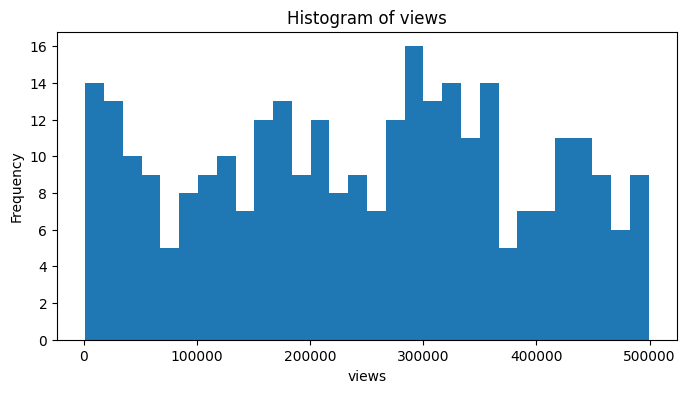

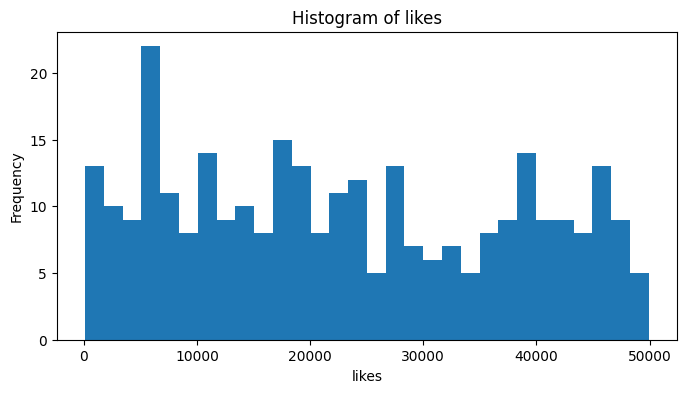

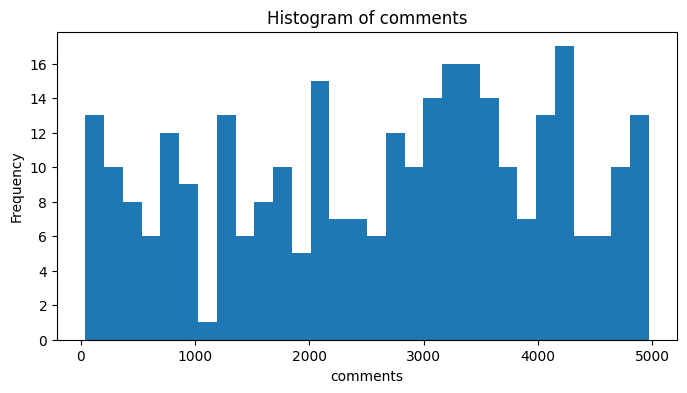

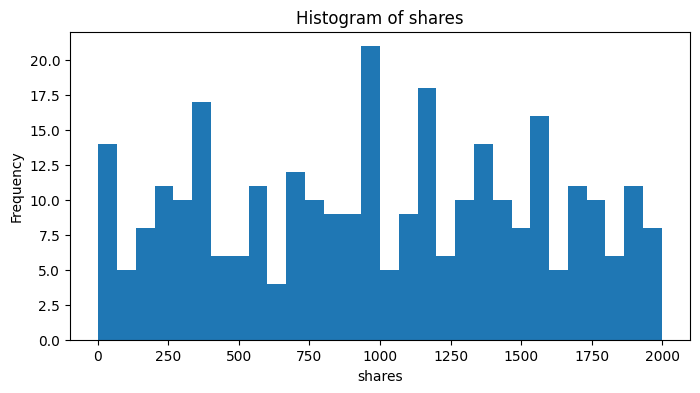

In [15]:
drawHistogram(df ,['views' , 'likes','comments','shares'])

<!-- Engagement Rate 
Histogram  -->

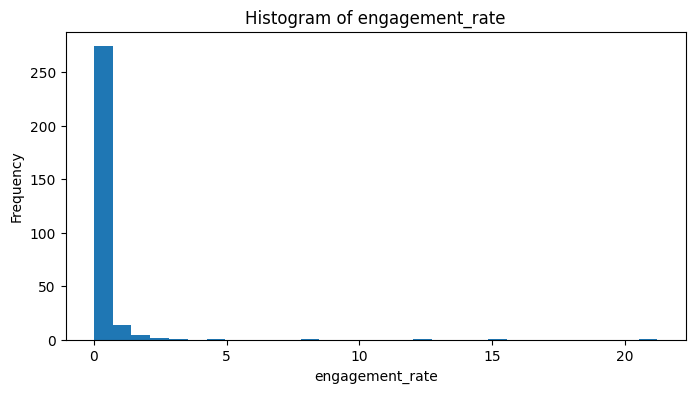

In [16]:
drawHistogram(df, ['engagement_rate'])

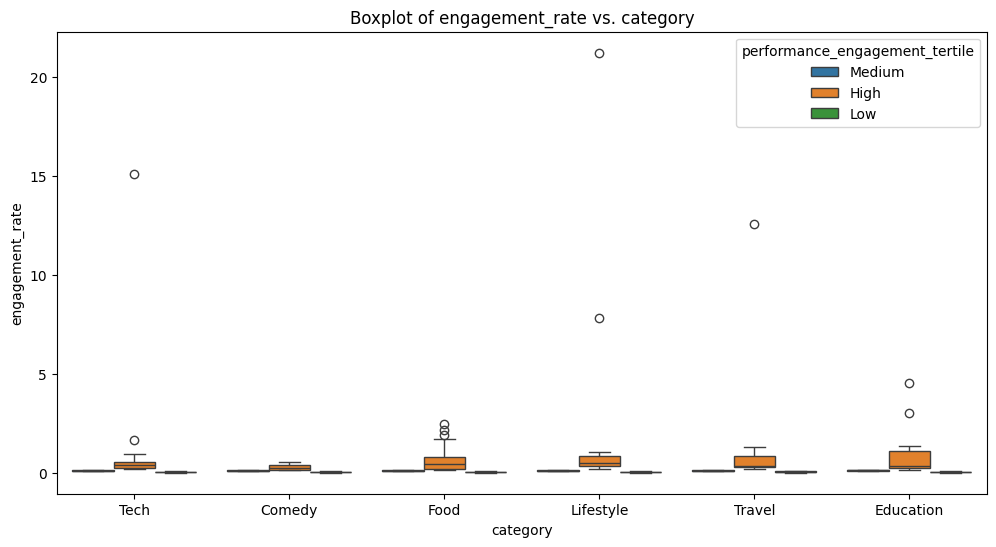

In [17]:
# Boxplot of Engagement Rate vs. Category
import matplotlib.pyplot as plt
import seaborn as sns
def drawBoxPlot(new_df , x_data , y_data ):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=x_data, y=y_data, data=new_df, hue='performance_engagement_tertile')
        plt.title(f'Boxplot of {y_data} vs. {x_data}')
        plt.xlabel(x_data)
        plt.ylabel(y_data)
        plt.show()


drawBoxPlot(df , 'category' , 'engagement_rate')

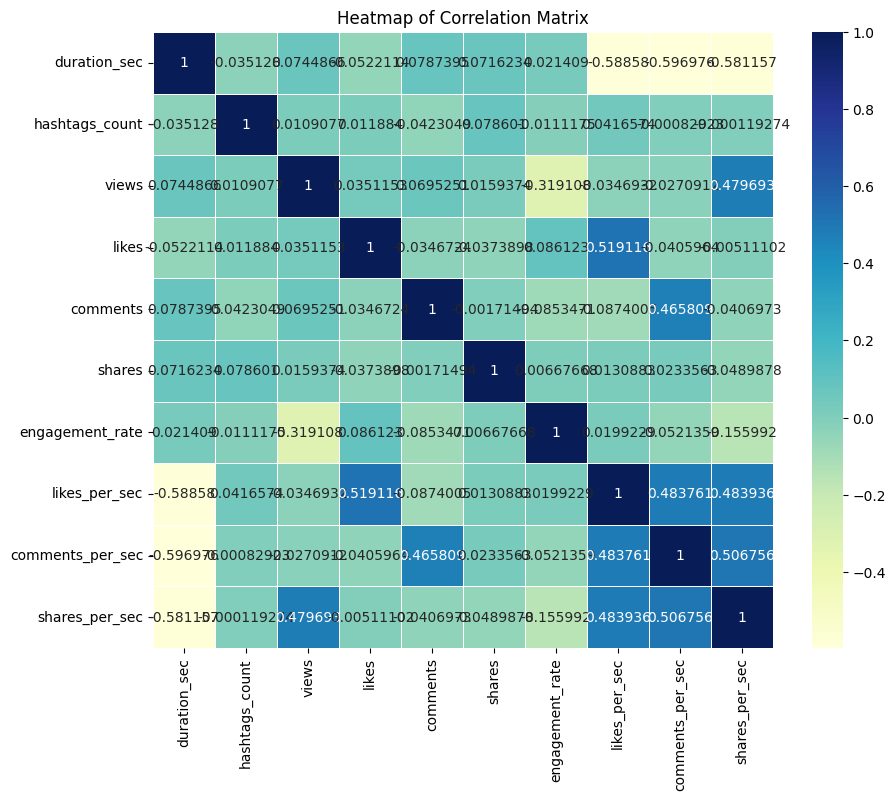

In [18]:
def drawHeatmap(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()


num_cols = [
    'duration_sec',
    'hashtags_count',
    'views', 'likes', 'comments', 'shares',
    'engagement_rate',
    'likes_per_sec', 'comments_per_sec', 'shares_per_sec'
]

corr = df[num_cols].corr()
drawHeatmap(corr)

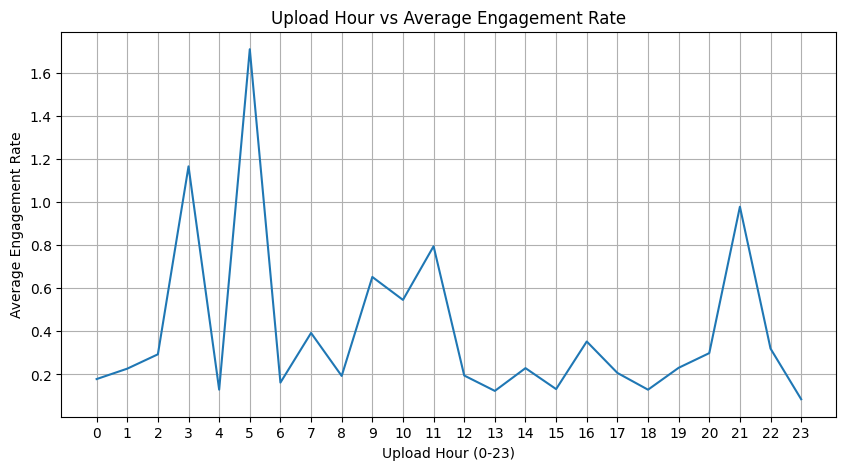

In [19]:
hourly_engagement = df.groupby('upload_hour')['engagement_rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_engagement.index, hourly_engagement.values)
plt.title("Upload Hour vs Average Engagement Rate")
plt.xlabel("Upload Hour (0-23)")
plt.ylabel("Average Engagement Rate")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

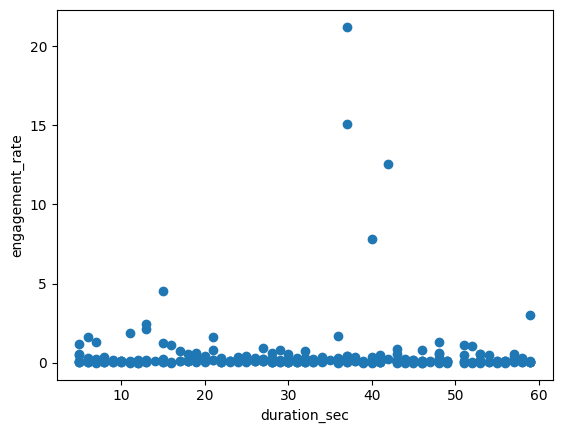

In [20]:
def drawScatterPlot(new_df ,x_data, y_data):
    plt.scatter(new_df[x_data], new_df[y_data])
    plt.xlabel(x_data)
    plt.ylabel(y_data)
    plt.show()


drawScatterPlot(df, 'duration_sec', 'engagement_rate')

In [21]:
def clanOutliers():
            # Columns to check for outliers
        original_count = len(df)
        cols_to_check = ['views', 'likes', 'comments', 'shares']

        # Calculate IQR and filter
        Q1 = df[cols_to_check].quantile(0.25)
        Q3 = df[cols_to_check].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Create the mask: Keep rows where ALL values are within bounds
        # Alternatively, we can remove if ANY is an outlier. Usually, we want to keep "valid" data.
        # Let's use: remove row if ANY column is an outlier.
        condition = ~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)

        df_clean = df[condition]
        cleaned_count = len(df_clean)
        removed_count = original_count - cleaned_count

        print(f"Original rows: {original_count}")
        print(f"Cleaned rows:  {cleaned_count}")
        print(f"Removed rows:  {removed_count}")
    # print(f"Outliers removed based on columns: {cols_to_check}")


clanOutliers()

Original rows: 300
Cleaned rows:  300
Removed rows:  0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from  sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline

target = 'performance_engagement_tertile'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split data
print(f"Training set shape: {X_train.shape}")

numeric_features = [
    'duration_sec', 'hashtags_count',
    'views', 'likes', 'comments', 'shares',
    'engagement_rate'
]

print(df)

categorical_features = ['category', 'upload_hour']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


Training set shape: (240, 13)
     duration_sec  hashtags_count   views  likes  comments  shares  \
0              43               9  198775  21933      3228     400   
1              56               2  290336  20063      3719    1942   
2              33               6  264206  37032      3228    1817   
3              19               9   85076  27269      2371     980   
4              47               8   90780   8041      2891    1109   
..            ...             ...     ...    ...       ...     ...   
295            15               3  248940  23810       488    1247   
296            32               4  366340  29586        46    1548   
297            29               3  434027   6471      3359    1069   
298            54               4  318623   6459      4873    1690   
299            27               6  217464  40731      4806    1136   

     upload_hour   category  engagement_rate performance_engagement_tertile  \
0              8       Tech         0.128593      

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier   # or LightGBM

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("XGBoost", XGBClassifier(eval_metric='mlogloss'))
]


In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd

def evaluate_models(models, preprocessor, X_train, y_train, k=5):
    """
    Evaluates multiple classification models using K-fold cross-validation.
    Applies preprocessing pipeline + model together.
    Returns a DataFrame with mean/std of Accuracy and F1-macro scores.
    """

    results = []

    # K-fold setup (stratified for balanced evaluation)
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    for name, model in models:
        # Full pipeline: preprocessing → model
        pipeline = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ])

        # Accuracy
        acc_scores = cross_val_score(
            pipeline, X_train, y_train,
            cv=skf, scoring='accuracy'
        )

        # F1-macro
        f1_scores = cross_val_score(
            pipeline, X_train, y_train,
            cv=skf, scoring='f1_macro'
        )

        results.append({
            "Model": name,
            "Accuracy Mean": acc_scores.mean(),
            "Accuracy Std": acc_scores.std(),
            "F1 Macro Mean": f1_scores.mean(),
            "F1 Macro Std": f1_scores.std()
        })

    return pd.DataFrame(results)


In [33]:
from sklearn.preprocessing import LabelEncoder
# Encode string labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['performance_engagement_tertile'])
# Now split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
results_df = evaluate_models(models, preprocessor, X_train, y_train, k=5)
print(results_df)


                 Model  Accuracy Mean  Accuracy Std  F1 Macro Mean  \
0  Logistic Regression       0.887500      0.048591       0.885520   
1        Random Forest       0.987500      0.016667       0.978848   
2                  KNN       0.770833      0.047507       0.764699   
3                  SVM       0.887500      0.059803       0.884836   
4              XGBoost       0.987500      0.016667       0.987463   

   F1 Macro Std  
0      0.048865  
1      0.018954  
2      0.044063  
3      0.060795  
4      0.016726  


In [35]:
from sklearn.model_selection import GridSearchCV

# Full pipeline: preprocessing + model
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

# Define parameter grid
rf_param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [5, 10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest F1-Macro:", rf_grid.best_score_)


Best Random Forest Params: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Random Forest F1-Macro: 0.9915281850765723


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(eval_metric='mlogloss'))
])

xgb_param_dist = {
    'model__n_estimators': [100, 200, 400, 600],
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'model__subsample': [0.5, 0.7, 1.0],
    'model__colsample_bytree': [0.5, 0.7, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_random.best_params_)
print("Best XGBoost F1-Macro:", xgb_random.best_score_)


Best XGBoost Params: {'model__subsample': 0.5, 'model__n_estimators': 400, 'model__max_depth': 9, 'model__learning_rate': 0.001, 'model__colsample_bytree': 0.7}
Best XGBoost F1-Macro: 0.9958292603453895


In [28]:
rf_params = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [10, None]
}

best_rf, rf_best_params, rf_best_score = tune_model(
    RandomForestClassifier(),
    rf_params,
    preprocessor,
    X_train,
    y_train,
    search_type="grid"
)

print("RF Best Params:", rf_best_params)
print("RF Best Score:", rf_best_score)


NameError: name 'tune_model' is not defined

In [29]:
xgb_params = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

best_xgb, xgb_best_params, xgb_best_score = tune_model(
    XGBClassifier(eval_metric='mlogloss'),
    xgb_params,
    preprocessor,
    X_train,
    y_train,
    search_type="random"
)

print("XGB Best Params:", xgb_best_params)
print("XGB Best Score:", xgb_best_score)


NameError: name 'tune_model' is not defined